# Hotel Search Data

## Goal

Being able to efficiently parse URLs and extract info from them is a very important skill for a data scientist.

Firstly, if you join a very early stage startup, it might be that a lot of data are just stored in the URLs visited by the users. And, therefore, you will have to build a system that parses the URLs, extracts fields out of it, and saves them into a table that can be easily queried (not the most fun of the jobs, but very useful!).

Secondly, often using external data can help a lot your models. And a way to get external data is by scraping websites. And this is often done by being able to play with a given site URL structure (assuming it is allowed by the external site ToS).

The goal of this project is to parse a sequence of URLs about user searches and extract some basic info out of it.


## Challenge Description

Company XYZ is a Online Travel Agent site, such as Expedia, Booking.com, etc.

They haven’t invested in data science yet and all the data they have about user searches are simply stored in the URLs the users generate when they search for a hotel. If you are not familiar with URLs, you can run a search on any OTA site and see how all search parameters are always present in the URL.

You are asked to:

- Create a clean data set where each column is a field in the URL, each row is a given search and the cells are the corresponding URL values.

For each search query, how many amenities were selected?



- Often, to measure the quality of a search algorithm, data scientists use some metric based on how often users click on the second page, third page, and so on. The idea here is that a great search algorithm should return all interesting results on the first page and never force users to visit the other pages (how often do you click on the second page results when you search on Google? Almost never, right?).

Create a metric based on the above idea and find the city with the worst search algorithm.

In [1]:
ls

16_Hotel_Search_Data.ipynb  url_list.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('url_list.txt') as f:
    lines = f.readlines()
    
print('Total Records:\t', len(lines))

Total Records:	 77677


In [4]:
names = ['checkin', 'checkout', 'customMinimumPriceFilter', 
             'customMaximumPriceFilter', 'freeCancellation', 'stars_5', 
             'stars_4', 'stars_3', 'stars_2', 'stars_1', 'max_score', 
             'min_score', 'couponCode', 'adults', 'city', 'children', 
             'amenities', 'search_page']

#df = pd.DataFrame(columns=names)
#df

In [5]:
#Too Slow!

#for i in range(len(lines)):
    #dict_temp = {}
    #for name in names:
        #dict_temp[name] = [np.nan]
    
    #for string in lines[i].split('&')[:-1]:
        #string1 = string.split('=')[0].split('.')[-1]
        #string2 = string.split('=')[1]
        
        #if string1 == 'city':
            #string2 = string2.replace('+',' ')
            
        #dict_temp[string1] = [string2]
        
    #df = df.append(pd.DataFrame(dict_temp))
    
    #if (i % 1000 == 0):
        #print(i)

In [6]:
dict_temp = {}
for name in names:
    dict_temp[name] = [np.nan] * len(lines)

for i in range(len(lines)):
    
    if (i<=5):
        print(lines[i])
    
    for string in lines[i].split('&'):
        string1 = string.split('=')[0].split('.')[-1]
        string2 = string.split('=')[1]
        
        if string1 == 'city':
            string2 = string2.replace('+',' ')
            
        if string1 == 'search_page':
            string2 = string2.replace('\n','')
        
        #print(string1,string2)
         
        dict_temp[string1][i] = string2
        
    if (i % 10000 == 0):
        print(i)

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-19&hotel.stars_4=yes&hotel.min_score=4&hotel.adults=3&hotel.city=New+York,+NY,+United+States&hotel.checkout=2015-09-20&hotel.search_page=1

0
http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-14&hotel.stars_3=yes&hotel.min_score=4&hotel.adults=3&hotel.city=London,+United+Kingdom&hotel.checkout=2015-09-15&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-26&hotel.customMaximumPriceFilter=175&hotel.stars_4=yes&hotel.min_score=5&hotel.adults=2&hotel.city=New+York,+NY,+United+States&hotel.checkout=2015-09-27&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-02&hotel.stars_5=yes&hotel.stars_4=yes&hotel.min_score=4&hotel.adults=1&hotel.city=Hong+Kong,+Hong+Kong&hotel.checkout=2015-09-03&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-20&hotel.customMaximumPriceFilter=275

In [7]:
df = pd.DataFrame(dict_temp, columns = names)
print(df.shape)
df.head(10)

(77677, 18)


,checkin,checkout,customMinimumPriceFilter,customMaximumPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1
5,2015-09-14,2015-09-16,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"San Francisco, California, United States",NaN,NaN,1
6,2015-09-20,2015-09-21,NaN,125,NaN,NaN,NaN,NaN,yes,NaN,NaN,5,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
7,2015-09-26,2015-09-27,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,1,"San Francisco, California, United States",NaN,NaN,1
8,2015-09-01,2015-09-02,NaN,75,NaN,NaN,NaN,NaN,yes,NaN,NaN,4,NaN,2,"New York, NY, United States",1,NaN,1
9,2015-09-25,2015-09-26,NaN,75,yes,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,1,"New York, NY, United States",NaN,NaN,1


In [8]:
df.checkin = pd.to_datetime(df.checkin)
df.checkout = pd.to_datetime(df.checkout)

df = df.rename(columns={'customMinimumPriceFilter': 'MinPrice', 
                        'customMaximumPriceFilter': 'MaxPrice'})

In [9]:
df.dtypes

checkin             datetime64[ns]
checkout            datetime64[ns]
MinPrice                    object
MaxPrice                    object
freeCancellation            object
stars_5                     object
stars_4                     object
stars_3                     object
stars_2                     object
stars_1                     object
max_score                   object
min_score                   object
couponCode                  object
adults                      object
city                        object
children                    object
amenities                   object
search_page                 object
dtype: object

In [10]:
df.isnull().sum()

checkin                 0
checkout                0
MinPrice            76407
MaxPrice            28389
freeCancellation    59728
stars_5             73374
stars_4             64973
stars_3             62815
stars_2             67746
stars_1             68354
max_score           72160
min_score           16851
couponCode          75456
adults                  0
city                    0
children            77417
amenities           76973
search_page             0
dtype: int64

## Question I

For each search query, how many amenities were selected?

In [11]:
df.amenities.unique()

array([nan, 'yes_smoking', 'shuttle', 'internet', 'yes_pet', 'breakfast',
       'lounge'], dtype=object)

In [12]:
df.amenities.value_counts()

internet       272
yes_smoking    170
shuttle        111
yes_pet         90
breakfast       39
lounge          22
Name: amenities, dtype: int64

## Question II

Often, to measure the quality of a search algorithm, data scientists use some metric based on how often users click on the second page, third page, and so on. The idea here is that a great search algorithm should return all interesting results on the first page and never force users to visit the other pages (how often do you click on the second page results when you search on Google? Almost never, right?).

Create a metric based on the above idea and find the city with the worst search algorithm.

In [13]:
df.search_page = df.search_page.astype(int)

In [14]:
df.search_page.value_counts()

1     50000
2     11637
3      5864
4      3635
5      2422
6      1636
7      1114
8       740
9       436
10      193
Name: search_page, dtype: int64

In [15]:
df.search_page[df.search_page >1] = 'Other_Pages'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.search_page[df.search_page == 1] = 'Page_One'

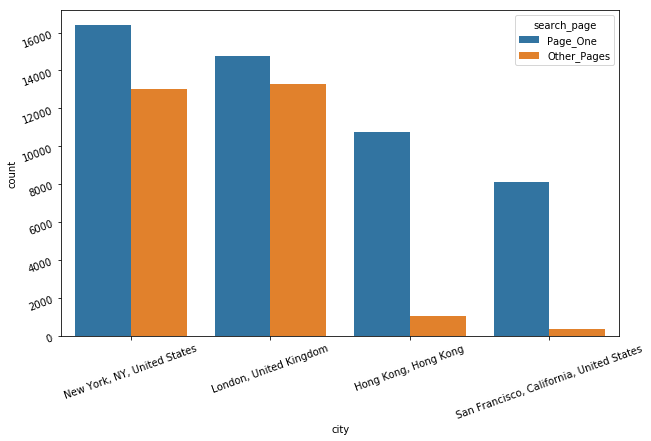

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df.city, hue=df.search_page, ax =ax)
ax.tick_params(labelrotation=20)
plt.show()

In [18]:
df2 = df[df.search_page == 'Page_One'].groupby('city').size().reset_index(name='page_one')
#df2
df3 = df[df.search_page == 'Other_Pages'].groupby('city').size().reset_index(name='other_pages')
#df3
df2 = pd.merge(df2, df3, how='left', on='city')
df2['ratio'] = df2.other_pages/df2.page_one
df2

,city,page_one,other_pages,ratio
0,"Hong Kong, Hong Kong",10735,1051,0.097904
1,"London, United Kingdom",14775,13283,0.899019
2,"New York, NY, United States",16385,12999,0.793348
3,"San Francisco, California, United States",8105,344,0.042443


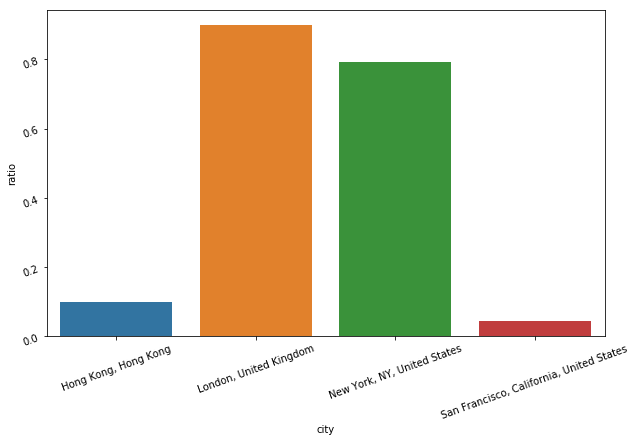

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df2.city, y= df2.ratio)
ax.tick_params(labelrotation=20)
plt.show()

New York and London should put more searches on page one.